In [1]:
from train_slot_attention import train

net = train()

1.10.0+cu113
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
     GaussianNoise-1            [-1, 3, 64, 64]               0
            Conv2d-2           [-1, 64, 64, 64]           4,864
              ReLU-3           [-1, 64, 64, 64]               0
            Conv2d-4           [-1, 64, 64, 64]         102,464
              ReLU-5           [-1, 64, 64, 64]               0
            Conv2d-6           [-1, 64, 64, 64]         102,464
              ReLU-7           [-1, 64, 64, 64]               0
            Conv2d-8           [-1, 64, 64, 64]         102,464
              ReLU-9           [-1, 64, 64, 64]               0
SlotAttention_encoder-10           [-1, 64, 64, 64]               0
           Linear-11           [-1, 64, 64, 64]             320
SoftPositionEmbed-12           [-1, 64, 64, 64]               0
        LayerNorm-13             [-1, 4096, 64]             128
           Linear-14  

2it [00:01,  1.81it/s]

Epoch 0 Global Step 0 Train Loss: 0.168783


44it [00:12,  3.48it/s]


KeyboardInterrupt: 

In [ ]:
from torchsummary import summary
summary(net, (1, 84, 84))

In [ ]:
%matplotlib inline
from data import get_loader
import torch
import numpy as np
loader = get_loader(total_samples=1)
iter, (x, mask) = list(enumerate(loader))[0]
x = x.to(torch.device("cuda"))
net.train()
recon_combined, recons, masks, slots = net.forward(x)

from util import show_mnist_images

show_mnist_images(x.cpu().detach().numpy()[0])
show_mnist_images(recon_combined.cpu().detach().numpy()[0])
show_mnist_images(recons[0].cpu().detach().numpy()[0])

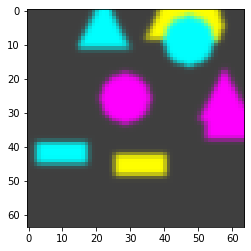

In [6]:

import matplotlib
import matplotlib.pyplot as plt
matplotlib.use("TkAgg")
%matplotlib inline
from data import get_loader
import torch
import numpy as np
loader = get_loader(dataset="color_shapes", total_samples=1)
iter, x = list(enumerate(loader))[0]

plt.imshow(x[0][0].permute((1,2,0)))